In [146]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from glob import glob

In [147]:
files = {a: sorted(glob(f'timing_data/{a}_timing_*')) for a in ('gpu', 'cpu')}

In [148]:
files

{'gpu': ['timing_data/gpu_timing_0100.txt',
  'timing_data/gpu_timing_0150.txt',
  'timing_data/gpu_timing_0200.txt',
  'timing_data/gpu_timing_0250.txt',
  'timing_data/gpu_timing_0300.txt',
  'timing_data/gpu_timing_0350.txt',
  'timing_data/gpu_timing_0400.txt',
  'timing_data/gpu_timing_0450.txt',
  'timing_data/gpu_timing_0500.txt',
  'timing_data/gpu_timing_0550.txt',
  'timing_data/gpu_timing_0600.txt',
  'timing_data/gpu_timing_0650.txt',
  'timing_data/gpu_timing_0700.txt',
  'timing_data/gpu_timing_0750.txt',
  'timing_data/gpu_timing_0800.txt',
  'timing_data/gpu_timing_0850.txt',
  'timing_data/gpu_timing_0900.txt',
  'timing_data/gpu_timing_0950.txt',
  'timing_data/gpu_timing_1000.txt',
  'timing_data/gpu_timing_1050.txt',
  'timing_data/gpu_timing_1100.txt',
  'timing_data/gpu_timing_1150.txt',
  'timing_data/gpu_timing_1200.txt',
  'timing_data/gpu_timing_1250.txt',
  'timing_data/gpu_timing_1300.txt',
  'timing_data/gpu_timing_1350.txt',
  'timing_data/gpu_timing_1400.

In [149]:
import os
def parse_timing_data(files):
    timing_data = []
    for file in files:
        f = open(file, 'r')
        timing = {}
        ncol = int(os.path.splitext(file)[0].split('_')[-1])
        for line in f.readlines():
            if 'Run LW' in line:
                current_band = 'LW'
                timing['LW'] = []
                timing['ncol'] = []
            elif 'Run SW' in line:
                current_band = 'SW'
                timing['SW'] = []
            elif 'total(s)' in line:
                timing[current_band].append(float(line.split(':')[1]))
                if current_band == 'LW': timing['ncol'].append(ncol)
        timing_data.append(timing)
    return timing_data

In [150]:
timing_data = {a: parse_timing_data(files[a]) for a in files.keys()}

Text(0, 0.5, 'Execution time (s)')

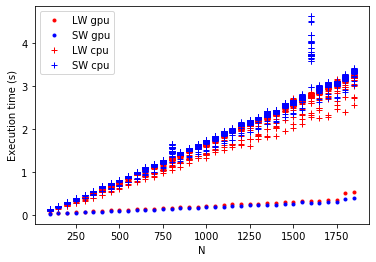

In [151]:
figure = pyplot.figure()
ax = figure.add_subplot()
colors = ('red', 'blue')
markers = ('.', '+')
flatten = lambda l: [item for sublist in l for item in sublist]
for iarch, arch in enumerate(timing_data.keys()):
    for iband, band in enumerate(('LW', 'SW')):
        ncol = [t['ncol'] for t in timing_data[arch]]
        vals = [t[band] for t in timing_data[arch]]
        pl = ax.plot(
            flatten(ncol), flatten(vals), color=colors[iband], 
            marker=markers[iarch], linestyle='none', label=f'{band} {arch}'
        )
        
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('Execution time (s)')

(0, 10)

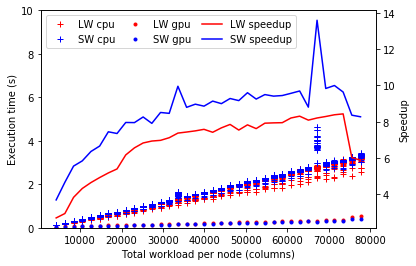

In [211]:
figure = pyplot.figure()
ax = figure.add_subplot()
colors = {'LW': 'red', 'SW': 'blue', 'gpu': 'black', 'cpu': 'grey'}
linestyles = {
    'LW': 'solid', 'SW': 'solid', 
    'gpu': 'none', 'cpu': 'none'
}
markers = {
    'cpu': '+', 'gpu': '.', 
    'LW': None, 'SW': None
}
plots = {}
pls = []
flatten = lambda l: [item for sublist in l for item in sublist]
for iband, band in enumerate(('LW', 'SW')):
    for iarch, arch in enumerate(timing_data.keys()):
        ncol = [42 * numpy.array(t['ncol']) for t in timing_data[arch]]
        vals = [t[band] for t in timing_data[arch]]
        pl = ax.plot(
            flatten(ncol), flatten(vals), color=colors[band], 
            marker=markers[arch], linestyle=linestyles[arch], label=f'{band} {arch}'
        )
        plots[f'{band} {arch}'] = pl.copy()
        pls.append(pl)
        
    # Plot speedup
    v1 = [numpy.mean(t[band]) for t in timing_data['cpu']]
    v2 = [numpy.mean(t[band]) for t in timing_data['gpu']]
    s = [c / g for (c, g) in zip(v1, v2)]
    ncol = [42 * numpy.mean(t['ncol']) for t in timing_data['cpu']]
    if iband == 0: ax2 = ax.twinx()
    pl = ax2.plot(
        ncol, s, 
        color=colors[band], 
        marker=markers[band],
        linestyle=linestyles[band], 
        label=f'{band} speedup'
    )
    plots[f'{band} speed-up'] = pl.copy()
    pls.append(pl)
    
#ax2.tick_params(axis='y', labelcolor='0.5')
#ax2.legend()
lines = [plots[c][0] for c in ('LW cpu', 'SW cpu', 'LW gpu', 'SW gpu', 'LW speed-up', 'SW speed-up', )]
#labels = ('LW speed-up', 'SW speed-up', 'CPU', 'GPU')
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, ncol=3, loc='upper left', columnspacing=1)
ax.set_xlabel('Total workload per node (columns)')
ax.set_ylabel('Execution time (s)')
ax2.set_ylabel('Speedup')
#ax2.legend(loc='best')
ax.set_ylim(0, 10)

In [212]:
figure.savefig('rrtmgp_timing.png', bbox_inches='tight')
figure.savefig('rrtmgp_timing.pdf', bbox_inches='tight')